In [ ]:
#image clustering
#Creates 4 groups of photos, groups by content similarly. Prints 7 of each group

In [ ]:
#Load the Drive helper and mount
from google.colab import drive#

# This will prompt for authorization.
#drive.mount('/content/drive/')
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
#set up paths
analys_path = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/analysis"
#folder_path = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data"
#set up paths
folder_path ="/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos"

In [ ]:
from glob import glob
import os
# load libraries for loading/processing the images and text analysis
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

#for natural language processing
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
#removed some libraries here

#translation libraries
from googletrans import Translator
import subprocess
import json



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553467096/553467096 [==============================] - 7s 0us/step


In [ ]:
#load images
flist = glob(os.path.join(folder_path, "**", "*.tif"), recursive = True)
#print((flist))

In [ ]:
print(len(flist))

427


In [ ]:
reload = True
#reload = False

if reload:
  # loop through each image in the dataset
  data = []
  fnames = []
  for img in flist:
    # try to extract the features and update the dictionary
    try:
      feat = extract_features(img,model)
      data.append(feat)
      fnames.append(img)
    except:
      pass

  npdata = np.array(data).reshape(-1,4096)

  with open(os.path.join(analys_path, '/npfeats.pkl'), 'wb') as f:
    pickle.dump(npdata, f)
  with open(os.path.join(analys_path, '/fnames.pkl'), 'wb') as f:
    pickle.dump(fnames, f)

else:
  with open(os.path.join(analys_path, '/npfeats.pkl'), 'rb') as f:
    npdata = pickle.load(f)
  with open(os.path.join(analys_path, '/fnames.pkl'), 'rb') as f:
    fnames = pickle.load(f)

1/1 [==============================] - 1s 557ms/step


In [ ]:
fnames

['/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0052.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0053.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0054.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0055.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0056.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0057.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0058.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0059.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0060.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0061.tif',
 '/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/im

In [ ]:
2# applying PCA
pca = PCA(n_components=len(flist)-100, random_state=22)
# changed to use number of images instead of static assignment #pca = PCA(n_components=100, random_state=22)
pca.fit(npdata)
x = pca.transform(npdata)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=22)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=22)

In [ ]:
kmeans.labels_

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 0, 3, 1, 1, 1, 3, 3, 2, 1, 3, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
groups = {}
for file, cluster in zip(range(0,425),kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box4img0002.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box4img0005.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box4img0029.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box8img0005.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box4img0032.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Griffis_Box15img0031.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box4img0015.tif


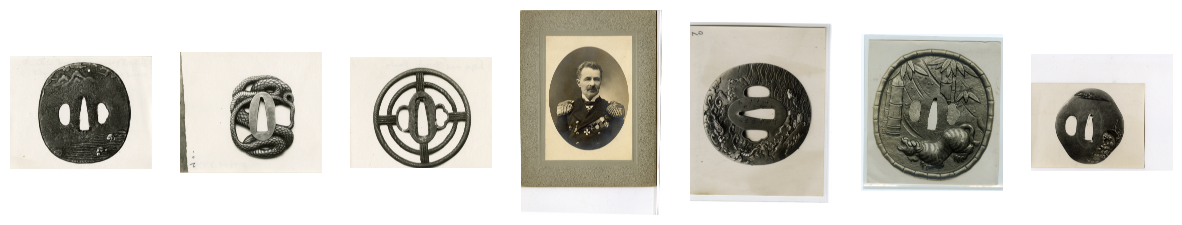

In [ ]:
num = 7;
plt.figure(figsize=(15,5))
np.random.shuffle(groups[0])

# Selecting the first n entries
grp0 = groups[0][:num]
print(f"Group 0")
for i, idx in enumerate(grp0):
  plt.subplot(1, num, i+1)
  plt.axis('off')
  plt.imshow(load_img(fnames[idx]))
  print(fnames[idx])

/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0099.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box7img0015.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0055.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box3img0034.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box2img0007.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Griffis_Box15img0021.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box2img0039.tif


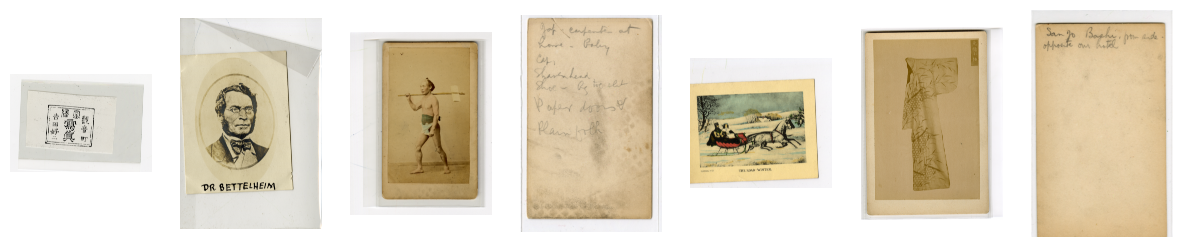

In [ ]:
num = 7;
plt.figure(figsize=(15,5))
np.random.shuffle(groups[1])
# Selecting the first n entries
grp1 = groups[1][:num]
print(f"Group 1")
for i, idx in enumerate(grp1):
  plt.subplot(1, num, i+1)
  plt.axis('off')
  plt.imshow(load_img(fnames[idx]))
  print(fnames[idx])

/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box12img0011.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box13img0024.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box12img0010.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box7img0014.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box12img0007.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box11img0011.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box3img0033.tif


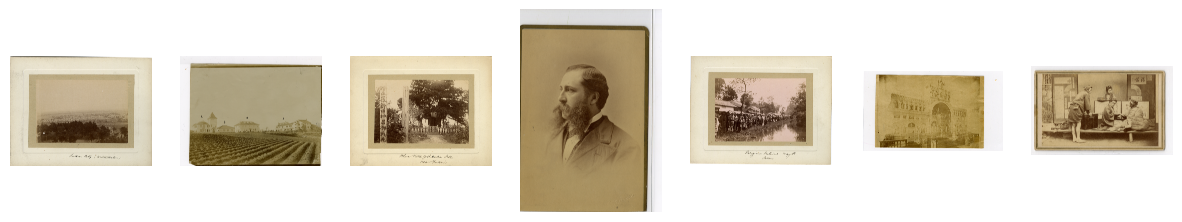

In [ ]:
num = 7;
plt.figure(figsize=(15,5))
np.random.shuffle(groups[2])
# Selecting the first n entries
grp2 = groups[2][:num]
print(f"Group 2")
for i, idx in enumerate(grp2):
  plt.subplot(1, num, i+1)
  plt.axis('off')
  plt.imshow(load_img(fnames[idx]))
  print(fnames[idx])

/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box10img0007.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box9img0011.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box11img0006.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box10img0039.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Griffis_Box14img0002.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/img0091.tif
/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos/Box13img0012.tif


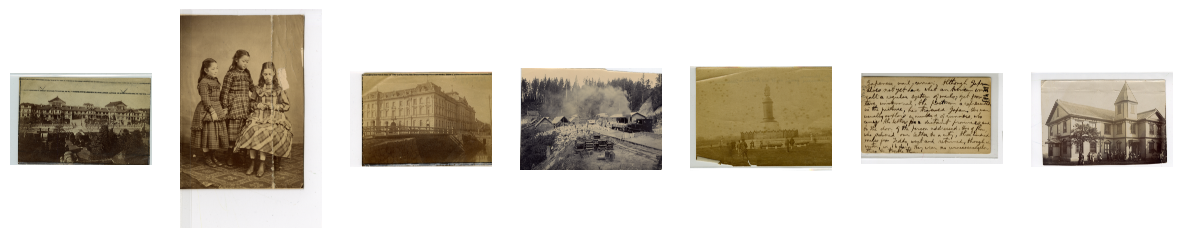

In [ ]:
num = 7;
plt.figure(figsize=(15,5))
np.random.shuffle(groups[3])
# Selecting the first n entries
grp3 = groups[3][:num]
print(f"Group 3")
for i, idx in enumerate(grp3):
  plt.subplot(1, num, i+1)
  plt.axis('off')
  plt.imshow(load_img(fnames[idx]))

  print(fnames[idx])